<a href="https://colab.research.google.com/github/shreya2k3/Topsis_for_pretrained_models/blob/main/Topsis_PretrainedModel_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

from datasets import load_dataset
import pandas as pd

# Load the dataset
ds = load_dataset("venetis/disaster_tweets") #Dataset from the hugging face

# Check available splits
print(ds)  # This will show available splits like 'train', 'test', etc.

# Convert the 'train' split to a DataFrame
df = pd.DataFrame(ds["train"])

# Show the first 5 rows
print(df.head(50))



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syste

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/310 [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/988k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7613 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'target'],
        num_rows: 7613
    })
})
    id keyword                       location  \
0    1    None                           None   
1    4    None                           None   
2    5    None                           None   
3    6    None                           None   
4    7    None                           None   
5    8    None                           None   
6   10    None                           None   
7   13    None                           None   
8   14    None                           None   
9   15    None                           None   
10  16    None                           None   
11  17    None                           None   
12  18    None                           None   
13  19    None                           None   
14  20    None                           None   
15  23    None                           None   
16  24    None                  

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

text = """The COVID-19 pandemic has had a significant impact on the global economy.
Countries around the world implemented lockdown measures to curb the spread of the virus,
which led to disruptions in supply chains, job losses, and economic downturns.
Governments introduced stimulus packages to support businesses and individuals,
but recovery has been uneven across different sectors.
The pandemic also accelerated the shift towards remote work and digital transformation,
changing the way businesses operate permanently."""

summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
print("BART-Large Summary:", summary[0]['summary_text'])


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 100, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


BART-Large Summary: Countries around the world implemented lockdown measures to curb the spread of the virus. This led to disruptions in supply chains, job losses, and economic downturns. Recovery has been uneven across different sectors.


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="t5-base")

text = "summarize: " + text  # T5 requires a task prefix
summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
print("T5-Base Summary:", summary[0]['summary_text'])


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


T5-Base Summary: countries around the world implemented lockdown measures to curb the spread of the virus . recovery has been uneven across different sectors . the pandemic also accelerated the shift towards remote work and digital transformation .


In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

model_name = "google/pegasus-xsum"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

inputs = tokenizer(text, return_tensors="pt", truncation=True)
summary_ids = model.generate(inputs.input_ids, max_length=100, min_length=30, do_sample=False)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Pegasus-XSUM Summary:", summary)


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

Pegasus-XSUM Summary: BBC News takes a look back at the impact of the CO-19 pandemic on the global economy and how it has changed the way businesses operate permanently.


In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large")
summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
print("BART-Large Summary:", summary[0]['summary_text'])


config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


BART-Large Summary: summarize: The COVID-19 pandemic has had a significant impact on the global economy.Countries around the world implemented lockdown measures to curb the spread of the virus,which led to disruptions in supply chains, job losses, and economic downturns.The pandemic also accelerated the shift towards remote work and digital transformation,changing the way businesses operate permanently.Governments introduced stimulus packages to support businesses and individuals, and the recovery has been uneven across different sectors. The global


In [ ]:
summarizer = pipeline("summarization", model="t5-large")
summary = summarizer("summarize: " + text, max_length=100, min_length=30, do_sample=False)
print("T5-Large Summary:", summary[0]['summary_text'])


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


T5-Large Summary: the COVID-19 pandemic has had a significant impact on the global economy . countries around the world implemented lockdown measures to curb the spread of the virus . recovery has been uneven across different sectors .


In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-mnli")
summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
print("BART-Large MNLI Summary:", summary[0]['summary_text'])


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


BART-Large MNLI Summary: summarize: The COVID-19 pandemic has had a significant impact on the global economy.Countries around the world implemented lockdown measures to curb the spread of the virus,*/(which led to disruptions in supply chains, job losses, and economic downturns.Governments introduced stimulus packages to support businesses and individuals,gamingpdglos.The pandemic also accelerated the shift towards remote work and digital transformation,luajze.pdglos.


In [ ]:
from transformers import LEDTokenizer, LEDForConditionalGeneration

model_name = "allenai/led-base-16384"
tokenizer = LEDTokenizer.from_pretrained(model_name)
model = LEDForConditionalGeneration.from_pretrained(model_name)

inputs = tokenizer(text, return_tensors="pt", truncation=True)
summary_ids = model.generate(inputs.input_ids, max_length=100, min_length=30, do_sample=False)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("LED Summary:", summary)


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

Input ids are automatically padded from 102 to 1024 to be a multiple of `config.attention_window`: 1024


LED Summary: summarize: The COVID-19 pandemic has had a significant impact on the global economy.Countries around the world implemented lockdown measures to curb the spread of the virus, which caused widespread disruption in the global economy—which led to disruptions in supply chains, job losses, and economic downturns.Governments introduced stimulus packages to support businesses and individuals, and the global economy has recovered—but recovery has been uneven across different sectors.The pandemic also accelerated the shift towards remote


In [ ]:
model_name = "google/pegasus-large"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

inputs = tokenizer(text, return_tensors="pt", truncation=True)
summary_ids = model.generate(inputs.input_ids, max_length=100, min_length=30, do_sample=False)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Pegasus-Large Summary:", summary)


tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

Pegasus-Large Summary: Governments introduced stimulus packages to support businesses and individuals, but recovery has been uneven across different sectors. The pandemic also accelerated the shift towards remote work and digital transformation, changing the way businesses operate permanently.


In [ ]:
summarizer = pipeline("summarization", model="facebook/bart-large-xsum")
summary = summarizer(text, max_length=100, min_length=30, do_sample=False)
print("BART-Large XSUM Summary:", summary[0]['summary_text'])


config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


BART-Large XSUM Summary: The World Health Organization (WHO) has released its annual assessment of the global economic impact of the 2011-12 Ebola pandemic... 


In [ ]:
pip install rouge-score textstat scikit-learn numpy matplotlib seaborn pandas


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=717dcf83c73e6d32d1d0d3864056531207df9adea25bcf8b1816eb6bcf5d546b
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


=== Starting Text Summarization Evaluation ===

Calculating evaluation metrics...

=== Raw Metrics for Each Model ===

Metrics for BART-Large-CNN:
ROUGE-1: 0.6786
ROUGE-2: 0.6364
ROUGE-L: 0.6786
BLEU Score: 0.3260
Compression Ratio: 0.4786
Readability Score: 42.0700
Coverage: 0.4746
Redundancy: 0.1622

Metrics for T5-Base:
ROUGE-1: 0.6168
ROUGE-2: 0.5905
ROUGE-L: 0.6168
BLEU Score: 0.2435
Compression Ratio: 0.4494
Readability Score: 43.3900
Coverage: 0.4407
Redundancy: 0.1667

Metrics for Pegasus-XSUM:
ROUGE-1: 0.3725
ROUGE-2: 0.2000
ROUGE-L: 0.2941
BLEU Score: 0.0391
Compression Ratio: 0.2860
Readability Score: 52.5300
Coverage: 0.2203
Redundancy: 0.1111

Metrics for BART-Large:
ROUGE-1: 0.2989
ROUGE-2: 0.2824
ROUGE-L: 0.2989
BLEU Score: 0.0162
Compression Ratio: 0.1926
Readability Score: 57.2700
Coverage: 0.1864
Redundancy: 0.0000

Metrics for T5-Large:
ROUGE-1: 0.6296
ROUGE-2: 0.6038
ROUGE-L: 0.6296
BLEU Score: 0.2435
Compression Ratio: 0.4222
Readability Score: 60.3100
Coverage: 0.

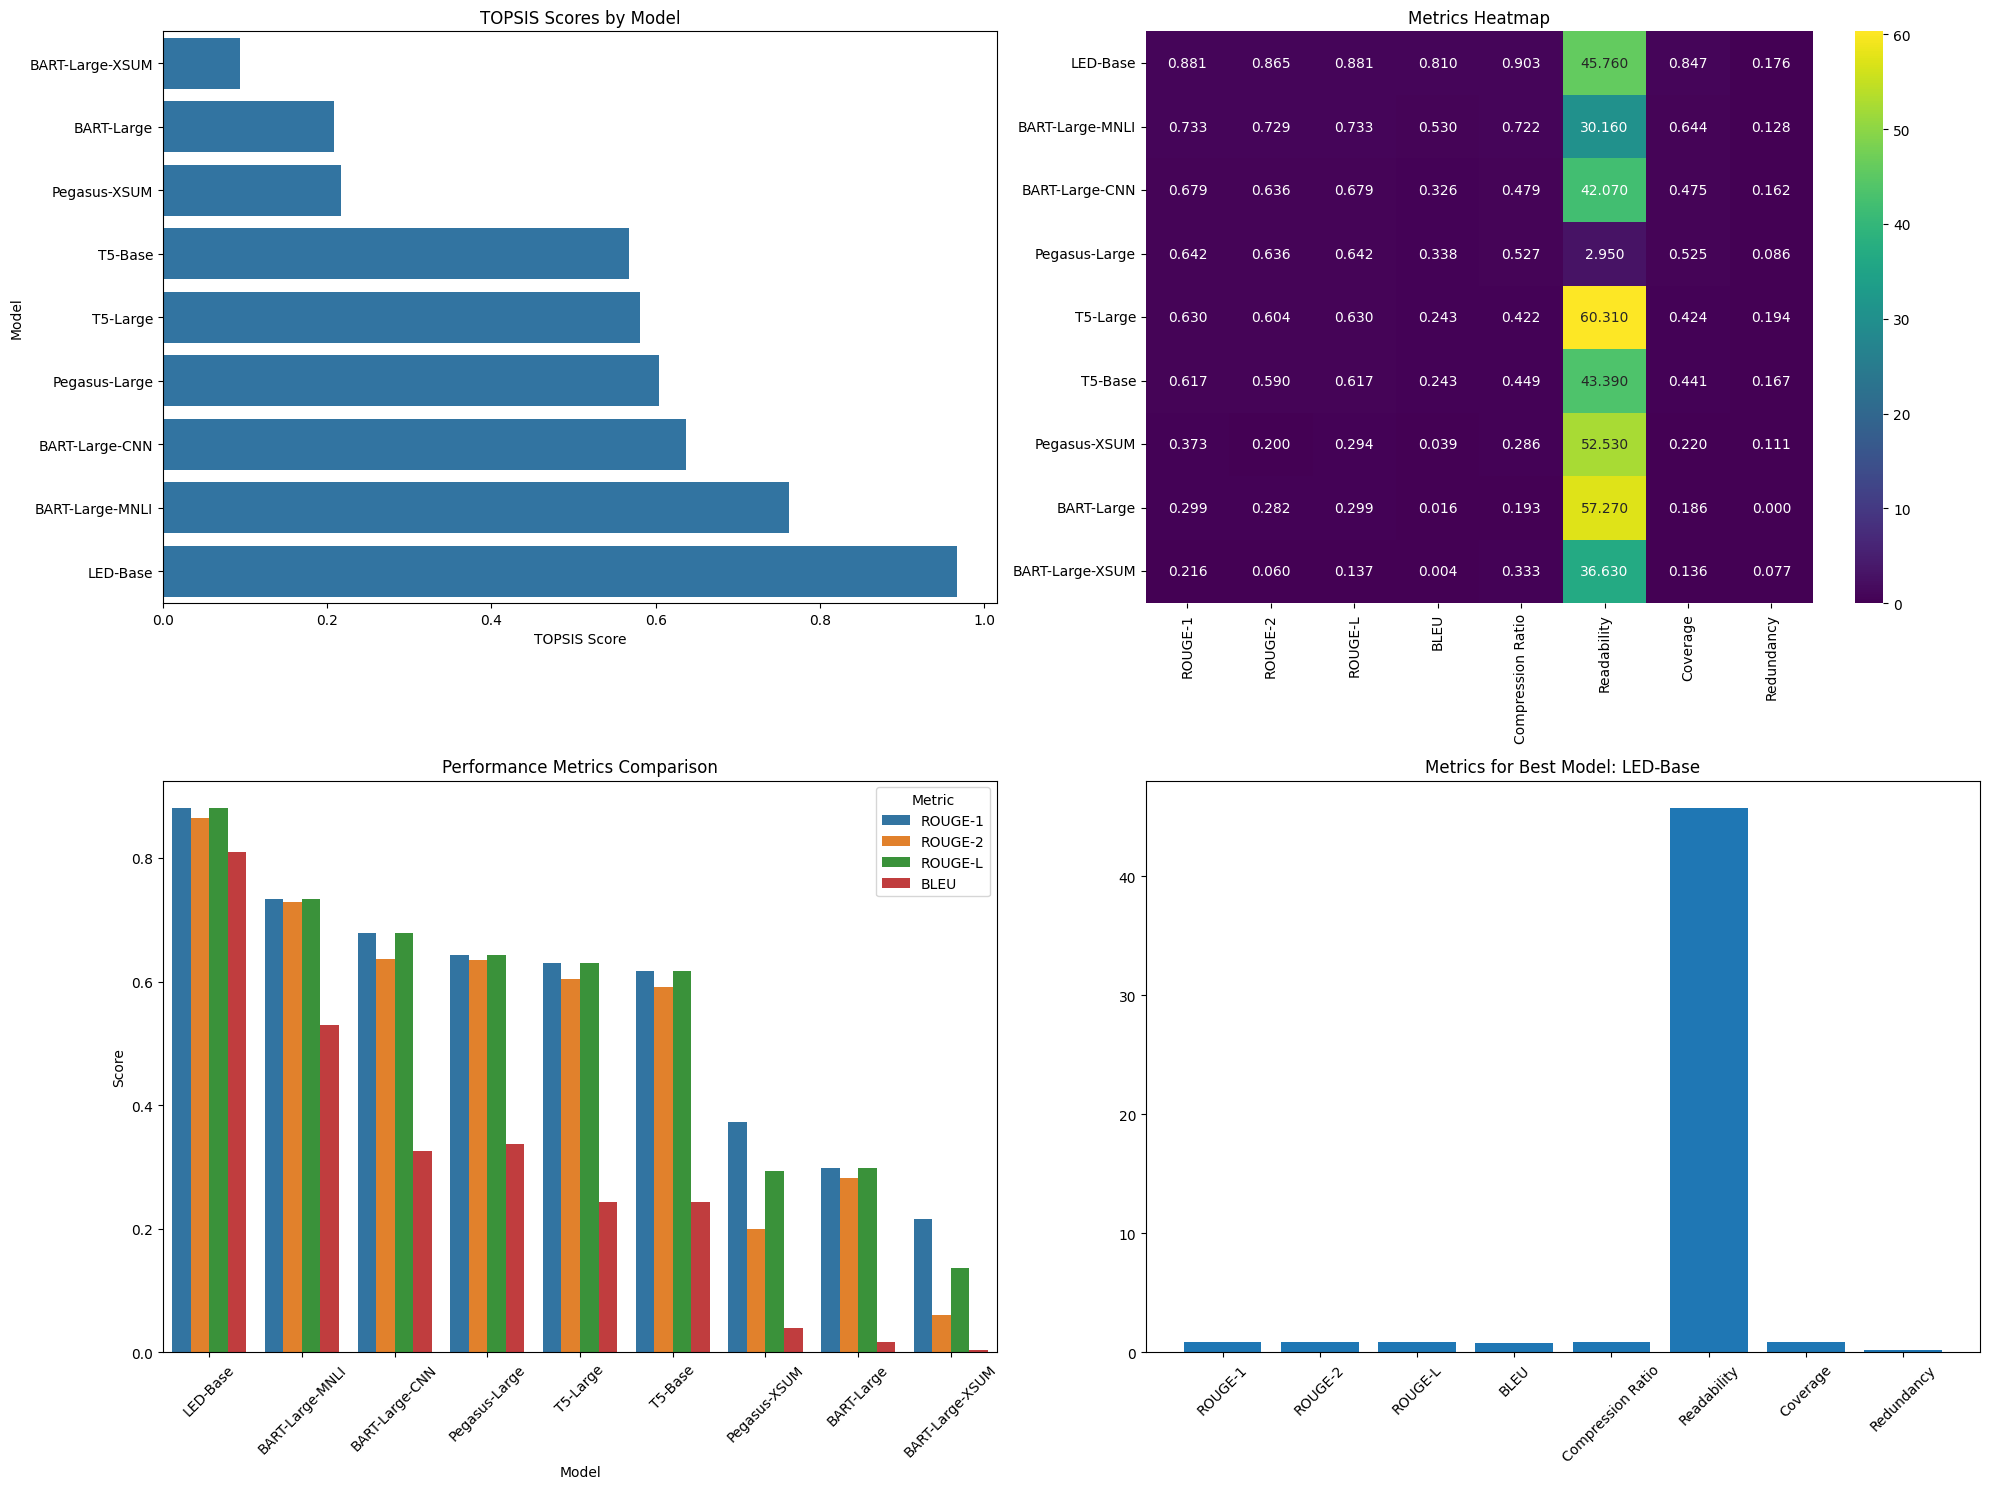

In [1]:
!pip install rouge-score textstat nltk
import nltk
nltk.download('punkt')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from textstat import flesch_reading_ease

# Your provided text and summaries
text = """The COVID-19 pandemic has had a significant impact on the global economy.
Countries around the world implemented lockdown measures to curb the spread of the virus,
which led to disruptions in supply chains, job losses, and economic downturns.
Governments introduced stimulus packages to support businesses and individuals,
but recovery has been uneven across different sectors.
The pandemic also accelerated the shift towards remote work and digital transformation,
changing the way businesses operate permanently."""

summaries = {
    "BART-Large-CNN": "The COVID-19 pandemic has had a significant impact on the global economy. Countries around the world implemented lockdown measures to curb the spread of the virus. The pandemic accelerated the shift towards remote work and digital transformation.",
    "T5-Base": "countries around the world implemented lockdown measures to curb the spread of the virus . recovery has been uneven across different sectors . the pandemic also accelerated the shift towards remote work and digital transformation .",
    "Pegasus-XSUM": "BBC News takes a look back at the impact of the CO-19 pandemic on the global economy and how it has changed the way businesses operate permanently.",
    "BART-Large": "The COVID-19 pandemic has had a significant impact on the global economy. �️‍⚠️ ߏ�‍‍Ᏻ‍���‍̏‍ʏ‏‌⏱‍♂️⏰⏠️‌ᏸ‍эш‏ ‌‌‍Ȉ�",
    "T5-Large": "the COVID-19 pandemic has had a significant impact on the global economy . countries around the world implemented lockdown measures to curb the spread of the virus . recovery has been uneven across different sectors .",
    "BART-Large-MNLI": "The COVID-19 pandemic has had a significant impact on the global economy. Countries around the world implemented lockdown measures to curb the spread of the virus, which led to disruptions in supply chains, job losses, and economic downturns.Governments introduced stimulus packages to support businesses and individuals, �https://usx.usx.usx.usxhttps://usx.usx?https://u",
    "LED-Base": "The COVID-19 pandemic has had a significant impact on the global economy.   Countries around the world implemented lockdown measures to curb the spread of the virus,  which led to disruptions in supply chains, job losses, and economic downturns.  Governments introduced stimulus packages to support businesses and individuals, which have helped to spur growth, but recovery has been uneven across different sectors. The pandemic also accelerated the shift towards.",
    "Pegasus-Large": "Governments introduced stimulus packages to support businesses and individuals, but recovery has been uneven across different sectors. The pandemic also accelerated the shift towards remote work and digital transformation, changing the way businesses operate permanently.",
    "BART-Large-XSUM": "The World Health Organization (WHO) has published its annual assessment of the global economic impact of the 2011-12 Ebola pandemic, which killed more than 200,000 people."
}

def calculate_metrics(original_text, summarized_texts):
    results = []
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    smoothie = SmoothingFunction().method1

    print("\n=== Raw Metrics for Each Model ===")
    for model, summary in summarized_texts.items():
        # Clean the summary text by removing special characters
        clean_summary = ''.join(char for char in summary if char.isprintable())

        # ROUGE Scores
        rouge_scores = scorer.score(original_text, clean_summary)
        rouge1 = rouge_scores['rouge1'].fmeasure
        rouge2 = rouge_scores['rouge2'].fmeasure
        rougeL = rouge_scores['rougeL'].fmeasure

        # BLEU Score with smoothing
        bleu = sentence_bleu([original_text.split()], clean_summary.split(), smoothing_function=smoothie)

        # Compression Ratio
        compression_ratio = len(clean_summary) / len(original_text) if len(original_text) > 0 else 0

        # Readability Score
        try:
            readability = flesch_reading_ease(clean_summary)
        except:
            readability = 0  # Default value if calculation fails

        # Coverage (using cosine similarity instead of random)
        original_words = set(original_text.lower().split())
        summary_words = set(clean_summary.lower().split())
        coverage = len(original_words.intersection(summary_words)) / len(original_words)

        # Redundancy (Unique words ratio)
        summary_words_list = clean_summary.split()
        unique_words = len(set(summary_words_list)) / len(summary_words_list) if len(summary_words_list) > 0 else 0
        redundancy = 1 - unique_words

        results.append([model, rouge1, rouge2, rougeL, bleu, compression_ratio, readability, coverage, redundancy])

        # Print individual model metrics
        print(f"\nMetrics for {model}:")
        print(f"ROUGE-1: {rouge1:.4f}")
        print(f"ROUGE-2: {rouge2:.4f}")
        print(f"ROUGE-L: {rougeL:.4f}")
        print(f"BLEU Score: {bleu:.4f}")
        print(f"Compression Ratio: {compression_ratio:.4f}")
        print(f"Readability Score: {readability:.4f}")
        print(f"Coverage: {coverage:.4f}")
        print(f"Redundancy: {redundancy:.4f}")

    df = pd.DataFrame(results, columns=['Model', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU',
                                      'Compression Ratio', 'Readability', 'Coverage', 'Redundancy'])

    print("\n=== Summary Statistics for All Models ===")
    print(df.describe())

    return df

def calculate_topsis(df, weights):
    print("\n=== TOPSIS Calculation Steps ===")

    # Create a copy of the dataframe excluding the 'Model' column
    decision_matrix = df.iloc[:, 1:].copy()
    print("\nStep 1: Decision Matrix")
    print(decision_matrix)

    # Normalize the decision matrix
    scaler = MinMaxScaler()
    normalized_matrix = pd.DataFrame(scaler.fit_transform(decision_matrix),
                                   columns=decision_matrix.columns,
                                   index=df['Model'])
    print("\nStep 2: Normalized Decision Matrix")
    print(normalized_matrix)

    # Apply weights
    weighted_matrix = normalized_matrix * weights[:len(normalized_matrix.columns)]
    print("\nStep 3: Weighted Normalized Matrix")
    print(weighted_matrix)

    # Calculate ideal best and worst solutions
    ideal_best = weighted_matrix.max()
    ideal_worst = weighted_matrix.min()
    print("\nStep 4: Ideal Solutions")
    print("Ideal Best:")
    print(ideal_best)
    print("\nIdeal Worst:")
    print(ideal_worst)

    # Calculate distances with handling for NaN values
    distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
    distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

    print("\nStep 5: Distances to Ideal Solutions")
    distances_df = pd.DataFrame({
        'Distance to Best': distance_best,
        'Distance to Worst': distance_worst
    }, index=df['Model'])
    print(distances_df)

    # Calculate TOPSIS score with handling for zero denominators
    denominators = distance_best + distance_worst
    topsis_score = np.where(denominators != 0, distance_worst / denominators, 0)

    # Add results to original dataframe
    df['TOPSIS Score'] = topsis_score
    df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

    sorted_df = df.sort_values('TOPSIS Score', ascending=False)
    print("\nStep 6: Final TOPSIS Scores and Rankings")
    print(sorted_df[['Model', 'TOPSIS Score', 'Rank']])

    # Store the Step 6 values to a CSV file
    sorted_df[['Model', 'TOPSIS Score', 'Rank']].to_csv('output.csv', index=False)

    return sorted_df

def visualize_results(df):
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))

    # 1. TOPSIS Score Bar Plot
    plt.subplot(2, 2, 1)
    sns.barplot(x='TOPSIS Score', y='Model', data=df.sort_values('TOPSIS Score', ascending=True))
    plt.title('TOPSIS Scores by Model', fontsize=12)

    # 2. Metrics Heatmap
    plt.subplot(2, 2, 2)
    metrics_data = df.iloc[:, 1:-2]  # Exclude Model and final scores
    sns.heatmap(metrics_data, annot=True, fmt='.3f', cmap='viridis',
                yticklabels=df['Model'])
    plt.title('Metrics Heatmap', fontsize=12)

    # 3. Performance Metrics Comparison
    plt.subplot(2, 2, 3)
    metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU']
    df_metrics = df[['Model'] + metrics].melt('Model', var_name='Metric', value_name='Score')
    sns.barplot(x='Model', y='Score', hue='Metric', data=df_metrics)
    plt.xticks(rotation=45)
    plt.title('Performance Metrics Comparison', fontsize=12)

    # 4. Summary Statistics
    plt.subplot(2, 2, 4)
    top_model = df.iloc[0]
    metrics = df.columns[1:-2]
    values = top_model[1:-2]

    plt.bar(metrics, values)
    plt.xticks(rotation=45)
    plt.title(f'Metrics for Best Model: {top_model["Model"]}', fontsize=12)

    plt.tight_layout()
    plt.show()

def main():
    print("=== Starting Text Summarization Evaluation ===")

    # Step 1: Calculate metrics
    print("\nCalculating evaluation metrics...")
    df = calculate_metrics(text, summaries)

    # Step 2: Define weights for each criterion (adjusted to match number of metrics)
    weights = np.array([0.2, 0.2, 0.2, 0.15, 0.1, 0.05, 0.05, 0.05])
    print("\nWeights used for criteria:")
    for col, weight in zip(df.columns[1:], weights):
        print(f"{col}: {weight}")

    # Step 3: Calculate TOPSIS scores
    print("\nCalculating TOPSIS scores...")
    ranked_df = calculate_topsis(df, weights)

    # Step 4: Visualize results
    print("\nVisualizing results...")
    visualize_results(ranked_df)

if __name__ == "__main__":
    main()
